In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g1 = pd.read_csv('gen1.csv')
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
Name     151 non-null object
Type1    151 non-null object
Type2    62 non-null object
Tier     138 non-null object
HP       151 non-null int64
Atk      151 non-null int64
Def      151 non-null int64
SpA      151 non-null int64
SpD      151 non-null int64
Spe      151 non-null int64
dtypes: int64(6), object(4)
memory usage: 11.9+ KB


In [3]:
del g1['SpD']
g1['Total'] = g1.HP + g1.Atk + g1.Def + g1.SpA + g1.Spe

In [4]:
g1.head(20)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
0,Abra,Psychic,NaN,LC,25,20,15,105,90,255
1,Aerodactyl,Flying,Rock,UU,80,105,65,60,130,440
2,Alakazam,Psychic,NaN,OU,55,50,45,135,120,405
3,Arbok,Poison,NaN,UU,60,85,69,65,80,359
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485
6,Beedrill,Bug,Poison,UU,65,80,40,45,75,305
7,Bellsprout,Grass,Poison,LC,50,75,35,70,40,270
8,Blastoise,Water,NaN,UU,79,83,100,85,78,425
9,Bulbasaur,Grass,Poison,LC,45,49,49,65,45,253


In [5]:
g1.sort_values('Total',ascending=False).head(10)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
82,Mewtwo,Psychic,NaN,Uber,106,110,90,154,130,590
81,Mew,Psychic,NaN,Uber,100,100,100,100,100,500
26,Dragonite,Dragon,Flying,UU,91,134,95,100,80,500
83,Moltres,Fire,Flying,UU,90,100,90,125,90,495
149,Zapdos,Electric,Flying,OU,90,90,85,125,100,490
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485
18,Cloyster,Ice,Water,OU,50,95,180,85,70,480
50,Gyarados,Flying,Water,UU,95,125,79,100,81,480
35,Exeggutor,Grass,Psychic,OU,95,95,85,125,55,455
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

def _radar_factory(num_vars):
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    theta += np.pi/2

    def unit_poly_verts(theta):
        x0, y0, r = [0.5] * 3
        verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
        return verts

    class RadarAxes(PolarAxes):
        name = 'radar'
        RESOLUTION = 1

        def fill(self, *args, **kwargs):
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            verts = unit_poly_verts(theta)
            return plt.Polygon(verts, closed=True, edgecolor='k')

        def _gen_axes_spines(self):
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def radar_graph(title='', labels = [], values = [], optimum = []):
    N = len(labels) 
    theta = _radar_factory(N)
    max_val = max(max(optimum), max(values))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='radar')
    ax.plot(theta, values, color='k')
    ax.plot(theta, optimum, color='r')
    ax.set_varlabels(labels)
    ax.set_title(title + '\n')
    plt.show()

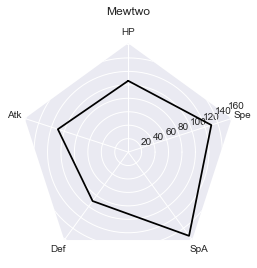

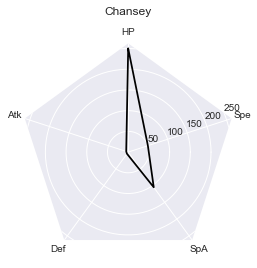

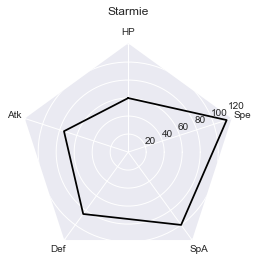

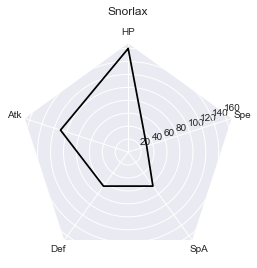

In [7]:
stats = ['HP','Atk','Def','SpA','Spe']
names = ['Mewtwo','Chansey','Starmie','Snorlax']

for n in names:
    radar_graph(title=n,labels=stats,values=g1[g1.Name==n][stats].values.tolist()[0],optimum=[0,0,0,0,0])

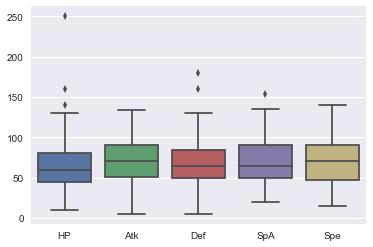

In [8]:
sns.boxplot(data=g1[['HP','Atk','Def','SpA','Spe']])

In [9]:
gstat = g1[['Name','Type1','Type2','HP','Atk','Def','SpA','Spe']]
gstat = pd.melt(gstat, id_vars=["Name", "Type1", "Type2"], var_name="Stat")

In [10]:
gstat.head()

,Name,Type1,Type2,Stat,value
0,Abra,Psychic,NaN,HP,25
1,Aerodactyl,Flying,Rock,HP,80
2,Alakazam,Psychic,NaN,HP,55
3,Arbok,Poison,NaN,HP,60
4,Arcanine,Fire,NaN,HP,90


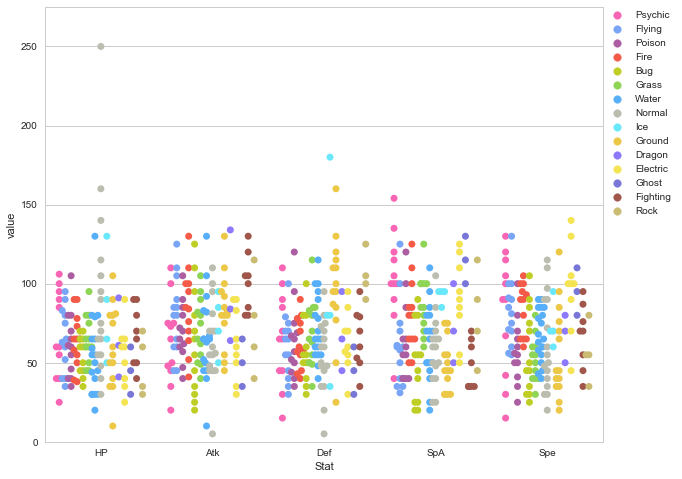

In [11]:
sns.set_style("whitegrid")
with sns.color_palette([
    '#FB61B4', '#75A4F9', '#AD5CA2', '#F95643', '#C3D221',
    '#8ED752', '#53AFFE', '#BBBDAF', '#66EBFF', '#F0CA42',
    '#8B76FF', '#F8E64E', '#7673DA', '#A35449', '#CDBD72',],
    n_colors=15, desat=.95):
    
    plt.figure(figsize=(10,8))
    plt.ylim(0, 275)
    sns.swarmplot(x="Stat", y="value", data=gstat, hue="Type1", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()

In [12]:
def heatm(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap="coolwarm")
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)
    plt.show()

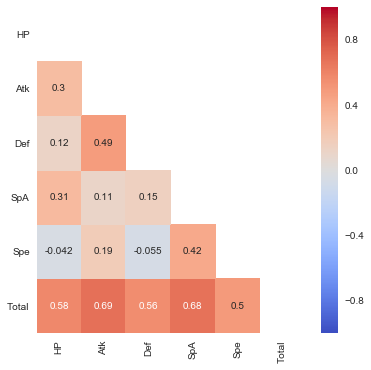

In [13]:
heatm(g1)

In [14]:
g1.groupby('Tier').agg(np.mean)

,HP,Atk,Def,SpA,Spe,Total
Tier,,,,,,
LC,45.518519,55.296296,53.500000,51.222222,54.388889,259.925926
OU,95.666667,80.000000,82.666667,94.666667,77.333333,430.333333
UU,71.641791,84.731343,77.134328,78.462687,79.208955,391.179104
Uber,103.000000,105.000000,95.000000,127.000000,115.000000,545.000000


In [15]:
g1['Used'] = g1['Tier'].map(lambda x: 1 if x == 'Uber' or x == 'OU' else 0)

In [16]:
g1.head()

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total,Used
0,Abra,Psychic,NaN,LC,25,20,15,105,90,255,0
1,Aerodactyl,Flying,Rock,UU,80,105,65,60,130,440,0
2,Alakazam,Psychic,NaN,OU,55,50,45,135,120,405,1
3,Arbok,Poison,NaN,UU,60,85,69,65,80,359,0
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455,0


In [17]:
g1.Used.value_counts()

0    134
1     17
Name: Used, dtype: int64

In [18]:
np.mean(g1.Used.values)

0.11258278145695365

In [19]:
g1.groupby('Used').agg(np.mean)

,HP,Atk,Def,SpA,Spe,Total
Used,,,,,,
0,60.111940,70.858209,66.134328,65.544776,67.156716,329.805970
1,96.529412,82.941176,84.117647,98.470588,81.764706,443.823529


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

In [70]:
stats = ['HP','Atk','Def','SpA','Spe','Total']

X = g1[stats]
y = g1.Used.values

In [80]:
X = g1[['Total']]
y = g1.Used.values

lr_params = {
    'solver':['liblinear'],
    'penalty':['l2','l1'],
    'C':range(1, 5, 1)
}

lr = LogisticRegression()

lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'penalty': 'l1', 'C': 1, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [81]:
lr_scores = cross_val_score(best_lr, X, y, cv=5)
print 'Scores', lr_scores
print 'Ave Score', np.mean(lr_scores)
print 'Baseline', 1 - np.mean(y)

Scores [ 0.87096774  0.87096774  0.93333333  0.9         0.89655172]
Ave Score 0.894364108268
Baseline 0.887417218543


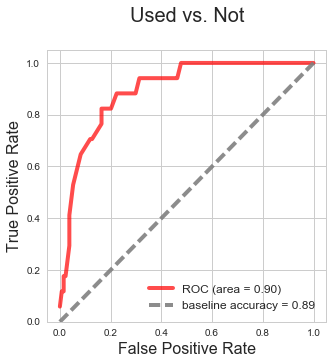

In [82]:
plot_roc(best_lr, X, y, 'Used')

In [83]:
coefs = pd.DataFrame({'Coef':best_lr.coef_[0],'Abs_Coef':np.abs(best_lr.coef_[0]),'Variable':X.columns})
coefs.sort_values('Abs_Coef',ascending=False,inplace=True)
coefs[:10]

,Abs_Coef,Coef,Variable
0,0.015588,0.015588,Total


In [71]:
lr_params = {
    'solver':['liblinear'],
    'penalty':['l2','l1'],
    'C':range(1, 5, 1)
}

lr = LogisticRegression()

lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'penalty': 'l1', 'C': 3, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


In [72]:
lr_scores = cross_val_score(best_lr, X, y, cv=5)
print 'Scores', lr_scores
print 'Ave Score', np.mean(lr_scores)
print 'Baseline', 1 - np.mean(y)

Scores [ 0.90322581  0.87096774  0.96666667  0.86666667  0.89655172]
Ave Score 0.900815721172
Baseline 0.887417218543


In [73]:
def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    fig, axr = plt.subplots(figsize=(5,5))
    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='r', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)
    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('False Positive Rate', fontsize=16)
    axr.set_ylabel('True Positive Rate', fontsize=16)
    axr.set_title(varname+' vs. Not\n', fontsize=20)
    axr.legend(loc="lower right", fontsize=12)
    plt.show()

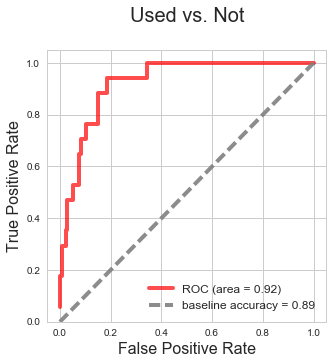

In [74]:
plot_roc(best_lr, X, y, 'Used')

In [75]:
coefs = pd.DataFrame({'Coef':best_lr.coef_[0],'Abs_Coef':np.abs(best_lr.coef_[0]),'Variable':X.columns})
coefs.sort_values('Abs_Coef',ascending=False,inplace=True)
coefs[:10]

,Abs_Coef,Coef,Variable
0,0.039881,0.039881,HP
2,0.029655,0.029655,Def
4,0.018976,0.018976,Spe
3,0.018754,0.018754,SpA
1,0.015421,-0.015421,Atk
5,0.005530,0.005530,Total


In [76]:
y_pred = best_lr.fit(X, y).predict(X)

In [77]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[131   3]
 [ 11   6]]


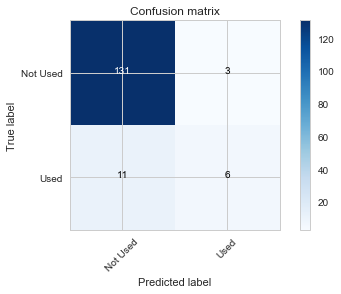

In [78]:
plot_confusion_matrix(confusion_matrix(y, y_pred),classes=['Not Used','Used'])